In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency



In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df = pd.concat([train, test], axis=0)

In [5]:
train.head()

,obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,job_desc_001,job_desc_002,job_desc_003,job_desc_004,job_desc_005,job_desc_006,job_desc_007,job_desc_008,job_desc_009,job_desc_010,job_desc_011,job_desc_012,job_desc_013,job_desc_014,job_desc_015,job_desc_016,job_desc_017,job_desc_018,job_desc_019,job_desc_020,job_desc_021,job_desc_022,job_desc_023,job_desc_024,job_desc_025,job_desc_026,job_desc_027,job_desc_028,job_desc_029,job_desc_030,job_desc_031,job_desc_032,job_desc_033,job_desc_034,job_desc_035,job_desc_036,job_desc_037,job_desc_038,job_desc_039,job_desc_040,job_desc_041,job_desc_042,job_desc_043,job_desc_044,job_desc_045,job_desc_046,job_desc_047,job_desc_048,job_desc_049,job_desc_050,job_desc_051,job_desc_052,job_desc_053,job_desc_054,job_desc_055,job_desc_056,job_desc_057,job_desc_058,job_desc_059,job_desc_060,job_desc_061,job_desc_062,job_desc_063,job_desc_064,job_desc_065,job_desc_066,job_desc_067,job_desc_068,job_desc_069,job_desc_070,job_desc_071,job_desc_072,job_desc_073,job_desc_074,job_desc_075,job_desc_076,job_desc_077,job_desc_078,job_desc_079,job_desc_080,job_desc_081,job_desc_082,job_desc_083,job_desc_084,job_desc_085,job_desc_086,job_desc_087,job_desc_088,job_desc_089,job_desc_090,job_desc_091,job_desc_092,job_desc_093,job_desc_094,job_desc_095,job_desc_096,job_desc_097,job_desc_098,job_desc_099,job_desc_100,job_desc_101,job_desc_102,job_desc_103,job_desc_104,job_desc_105,job_desc_106,job_desc_107,job_desc_108,job_desc_109,job_desc_110,job_desc_111,job_desc_112,job_desc_113,job_desc_114,job_desc_115,job_desc_116,job_desc_117,job_desc_118,job_desc_119,job_desc_120,job_desc_121,job_desc_122,job_desc_123,job_desc_124,job_desc_125,job_desc_126,job_desc_127,job_desc_128,job_desc_129,job_desc_130,job_desc_131,job_desc_132,job_desc_133,job_desc_134,job_desc_135,job_desc_136,job_desc_137,job_desc_138,job_desc_139,job_desc_140,job_desc_141,job_desc_142,job_desc_143,job_desc_144,job_desc_145,job_desc_146,job_desc_147,job_desc_148,job_desc_149,job_desc_150,job_desc_151,job_desc_152,job_desc_153,job_desc_154,job_desc_155,job_desc_156,job_desc_157,job_desc_158,job_desc_159,job_desc_160,job_desc_161,job_desc_162,job_desc_163,job_desc_164,job_desc_165,job_desc_166,job_desc_167,job_desc_168,job_desc_169,job_desc_170,job_desc_171,job_desc_172,job_desc_173,job_desc_174,job_desc_175,job_desc_176,job_desc_177,job_desc_178,job_desc_179,job_desc_180,job_desc_181,job_desc_182,job_desc_183,job_desc_184,job_desc_185,job_desc_186,job_desc_187,job_desc_188,job_desc_189,job_desc_190,job_desc_191,job_desc_192,job_desc_193,job_desc_194,job_desc_195,job_desc_196,job_desc_197,job_desc_198,job_desc_199,job_desc_200,job_desc_201,job_desc_202,job_desc_203,job_desc_204,job_desc_205,job_desc_206,job_desc_207,job_desc_208,job_desc_209,job_desc_210,job_desc_211,job_desc_212,job_desc_213,job_desc_214,job_desc_215,job_desc_216,job_desc_217,job_desc_218,job_desc_219,job_desc_220,job_desc_221,job_desc_222,job_desc_223,job_desc_224,job_desc_225,job_desc_226,job_desc_227,job_desc_228,job_desc_229,job_desc_230,job_desc_231,job_desc_232,job_desc_233,job_desc_234,job_desc_235,job_desc_236,job_desc_237,job_desc_238,job_desc_239,job_desc_240,job_desc_241,job_desc_242,job_desc_243,job_desc_244,job_desc_245,job_desc_246,job_desc_247,job_desc_248,job_desc_249,job_desc_250,job_desc_251,job_desc_252,job_desc_253,job_desc_254,job_desc_255,job_desc_256,job_desc_257,job_desc_258,job_desc_259,job_desc_260,job_desc_261,job_desc_262,job_desc_263,job_desc_264,job_desc_265,job_desc_266,job_desc_267,job_desc_268,job_desc_269,job_desc_270,job_desc_271,job_desc_272,job_desc_273,job_desc_274,job_desc_275,job_desc_276,job_desc_277,job_desc_278,job_desc_279,job_desc_280,job_desc_281,job_desc_282,job_desc_283,job_desc_284,job_desc_285,job_desc_286,job_desc_287,job_desc_288,job_desc_289,job_desc_290,job_desc_291,job_desc_292,job_desc_293,job_desc_29

In [6]:
train_dir = train[['job_title', 'job_posted_date', 'salary_category', 'job_state', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12' ]]

### Analysis of Normal Features

In [7]:
pd.crosstab(train_dir['job_title'], train_dir['salary_category'])

salary_category,High,Low,Medium
job_title,,,
Job_Title_1,0,4,5
Job_Title_10,0,3,5
Job_Title_11,1,0,0
Job_Title_12,1,0,0
Job_Title_13,2,0,0
Job_Title_14,0,0,1
Job_Title_15,1,0,0
Job_Title_2,1,0,4
Job_Title_3,3,2,4


In [9]:
contingency_table = pd.crosstab(train_dir['job_title'], train_dir['salary_category'])

# Calculate the Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
# print("Expected frequencies:\n", expected) # Uncomment to see expected frequencies

# Interpret the results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between job_title and salary_category.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between job_title and salary_category.")

Chi-square statistic: 50.41408721579297
P-value: 0.011227833521336049
Degrees of freedom: 30
Reject the null hypothesis: There is a significant association between job_title and salary_category.


<Axes: xlabel='salary_category', ylabel='job_title'>

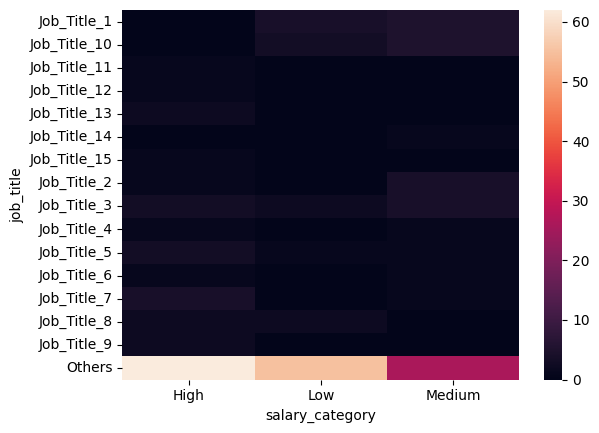

In [10]:
sns.heatmap(pd.crosstab(train_dir['job_title'], train_dir['salary_category']))